In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 READING THE DATA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Drug Classification/Drug Dataset/drug200.csv")

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


Checking for Null Values

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
len(df)

200

CHECK FOR DUPLICATE ROWS

In [ ]:
df.duplicated().sum()

0

Column descriptions
* 1.Age->Age of patient
* 2.Sex->Gender of Patient
* 3.BP->Blood Pressure
* 4.Cholesterol
* 5.Na_to_K->Sodium to Potassium ratio
* 6.Drug->Drug type(Target Variable)

In [ ]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

Dataset contains only male and female data

In [ ]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

# **BASIC EDA**

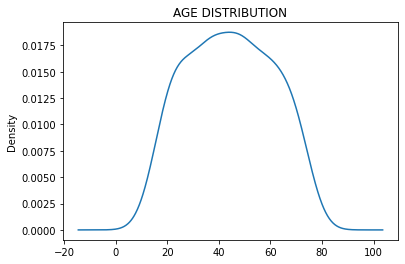

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("AGE DISTRIBUTION")
df['Age'].plot(kind='kde')

In [ ]:
print("Mean Patient Age is: "+str(df['Age'].mean()))

Mean Patient Age is: 44.315


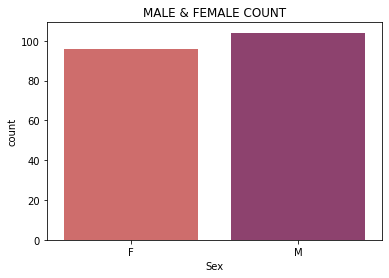

In [ ]:
plt.title("MALE & FEMALE COUNT")
sns.countplot(df['Sex'],palette='flare')

In [ ]:
print("% of male & female")
(df.Sex.value_counts()/200)*100

% of male & female


M    52.0
F    48.0
Name: Sex, dtype: float64

* All most equal number of Females and males present in Data

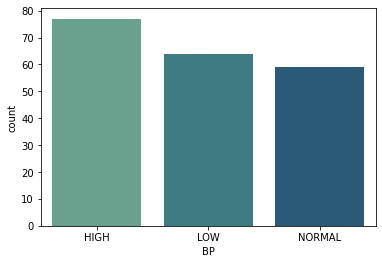

In [ ]:
sns.countplot(df['BP'],palette='crest')

In [ ]:
(df['BP'].value_counts())*100/200

HIGH      38.5
LOW       32.0
NORMAL    29.5
Name: BP, dtype: float64

* Only about 30 percent of the patients have normal BP 

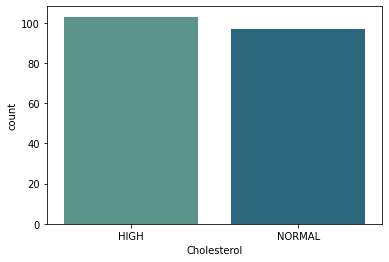

In [ ]:
sns.countplot(df['Cholesterol'],palette='crest')

In [ ]:
(df['Cholesterol'].value_counts())*100/200

HIGH      51.5
NORMAL    48.5
Name: Cholesterol, dtype: float64

* Almost half of the patients have high cholestrol

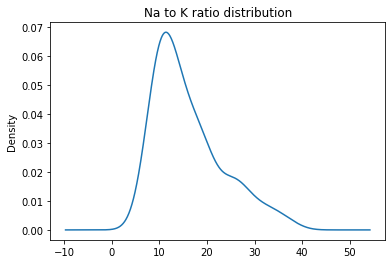

In [ ]:
plt.title("Na to K ratio distribution")
df['Na_to_K'].plot(kind='kde')

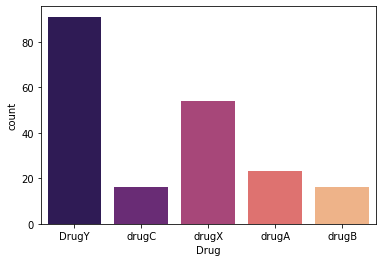

In [ ]:
sns.countplot(df['Drug'],palette='magma')

* Drug Y is the most used among patient
* Drug used is unbalanced

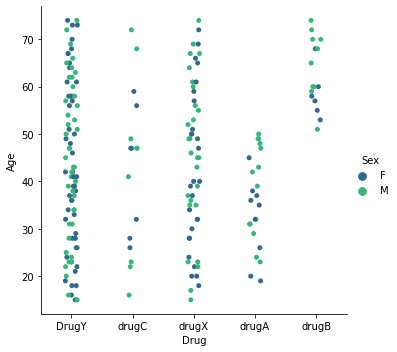

In [ ]:
sns.catplot(x="Drug", y="Age",hue="Sex",data=df,palette='viridis')

* Drug B is only used by patients of Age > 50
* Drug A is only used by patients of Age < 50

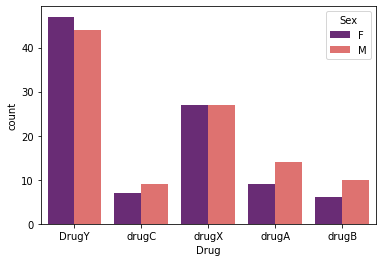

In [ ]:
sns.countplot(data=df,x='Drug',hue='Sex',palette='magma')

Drug Y is used more by Females while some others are used more by males 

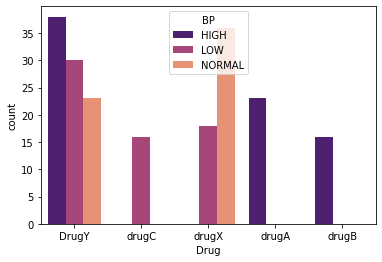

In [ ]:
sns.countplot(data=df,x='Drug',hue='BP',palette='magma')

* Drug Y are mostly used by people with HIGH bp
* Drug C is only used by people with LOW bp
* Drug X is not used by people with HIGH bp
* Drug A & B is only used by people with HIGH bp

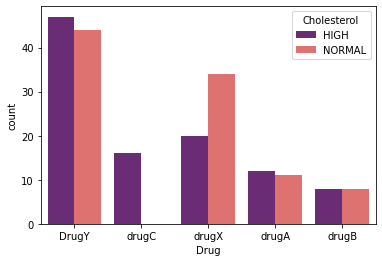

In [ ]:
sns.countplot(data=df,x='Drug',hue='Cholesterol',palette='magma')

* Drug C is only taken by people with HIGH cholestrol

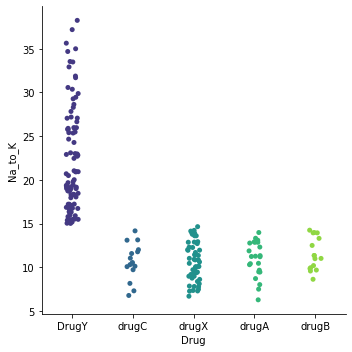

In [ ]:
sns.catplot(x="Drug", y="Na_to_K",data=df,palette='viridis')

* Drug Y is only used by patients with Na to k ratio > 15

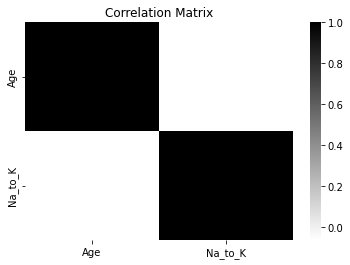

In [ ]:
plt.title("Correlation Matrix")
sns.heatmap(df.corr(),cmap='binary')

* Age is Not related to Na to K ratio

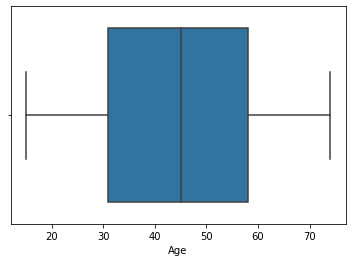

In [ ]:
sns.boxplot(df['Age'])

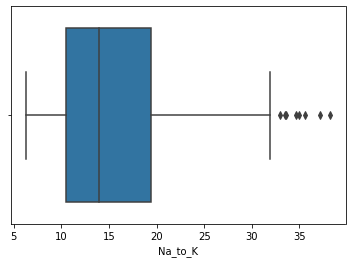

In [ ]:
sns.boxplot(df['Na_to_K'])

There are some outliers

# **Feature Engineering**

* Na to K can be used to create a new feature<br>
* Use Na to K >= 15 to create new feature

In [ ]:
df['NAK'] = df['Na_to_K'].apply(lambda x: 1 if x >= 15 else 0)

# **Preparing data for modelling**

In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'NAK'], dtype='object')

In [ ]:
###Categorical Variables
cols = ['Sex','BP','Cholesterol','Drug','NAK']

In [ ]:
###label encoding
from sklearn.preprocessing import LabelEncoder
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,NAK
0,23,0,0,0,25.355,0,1
1,47,1,1,0,13.093,3,0
2,47,1,1,0,10.114,3,0
3,28,0,2,0,7.798,4,0
4,61,0,1,0,18.043,0,1


In [ ]:
###scaling
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ncols = ['Age','Na_to_K']
df[ncols] = ms.fit_transform(df[ncols])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,NAK
0,0.135593,0,0,0,0.596848,0,1
1,0.542373,1,1,0,0.213397,3,0
2,0.542373,1,1,0,0.120239,3,0
3,0.220339,0,2,0,0.047814,4,0
4,0.779661,0,1,0,0.368191,0,1


In [ ]:
y = df['Drug']
X = df.drop('Drug',axis=1)

# **MODELLING**

In [ ]:
scores = {}

1.KNN using kfold cross validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
scores['Knn'] = np.mean(cv_scores)
print(f"KNN SCORE : {np.mean(cv_scores)}")

KNN SCORE : 0.985


2.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
cv_scores = cross_val_score(rfc, X, y, cv=5)
scores['RandomForest'] = np.mean(cv_scores)
print(f"Random Forest Score : {np.mean(cv_scores)}")

Random Forest Score : 0.99


3.Extra Tress

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = 42)
cv_scores = cross_val_score(etc, X, y, cv=5)
scores['ExtraTree'] =  np.mean(cv_scores)
print(f"ExtraTrees Score : {np.mean(cv_scores)}")

ExtraTrees Score : 0.99


TypeError: ignored

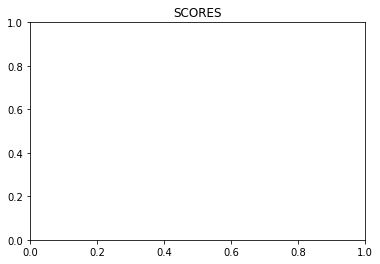

In [ ]:
plt.title("SCORES")
plt.hist(scores)